## Step 1: Importing Libraries

In [ ]:
# Import the requried modules/libraries
import re
import ast # This is useful to convert the string representation of lists to actual lists
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from matplotlib.gridspec import GridSpec
import textwrap
from functools import reduce
import time
import os
import json
import geopandas as gpd
import folium



# Mount the google drive
from google.colab import drive
drive.mount('/content/drive')

# Ignore warnings
import warnings
warnings.filterwarnings('ignore')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# display all the rows, columns and display them at max width
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)
pd.set_option('display.width', None)
pd.set_option('display.max_colwidth', None)

## Step 2: Reading the data

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/RA Part-time UMD/Lubbock Project/After Jan 16th 2025/FinalData/Step3_AddedZoningData/dfall_with_zoning_details.csv')

In [ ]:
df.sample(100)

,Address,ZipCode,Latitude,Longitude,ValueOfCityProperty_1945,ValueOfPersonalProperty_1945,TotalValue_1945,F2025DollarValueTotalValue_1945,StateTax_1945,CountyTax_1945,GrossTax_1945,Area_1945,Homestead_1945,DistrictSchool_1945,AddressRepetition_1945,StateValueDollars_1975,ValueOfCityProperty_1975,ValueOfPersonalProperty_1975,TotalValue_1975,F2025DollarValueTotalValue_1975,StateTax_1975,CountyTax_1975,GrossTax_1975,Area_1975,Homestead_1975,DistrictSchool_1975,AddressRepetition_1975,LandValue__1985,BuildingValue_1985,SpecialFeaturesValue_1985,TotalValue_1985,F2025DollarValueTotalValue_1985,CountyTax_1985,CityTax_1985,SchoolTax_1985,LCHDTax_1985,GrossTax_1985,AreaSqm_1985,AreaSqft_1985,Homestead_1985,SchoolValue_1985,CountyValue_1985,CityValue_1985,AddressRepetition_1985,TotalValue_2012,F2025DollarValueTotalValue_2012,LandValue_2012,ImpValue_2012,LandSizeAC_2012,LandSizeFT_2012,YearBuilt_2012,TotalValue_2020,F2025DollarValueTotalValue_2020,LandValue_2020,ImpValue_2020,LandSizeAC_2020,LandSizeFT_2020,YearBuilt_2020,TotalValue_2021,F2025DollarValueTotalValue_2021,LandValue_2021,ImpValue_2021,LandSizeAC_2021,LandSizeFT_2021,YearBuilt_2021,ValuePresence,IsInLubbock,IsInCouncilDistrict,IsInRedliningZone,IsInRedliningZone_half_mile,IsInRedliningZone_one_mile
78707,"6205 17th St, Lubbock, TX 79416, USA",79416,33.580520,-101.950807,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,130348.0,178576.76,9600.0,120748.0,0.0,6600.0,2002.0,149786.0,182738.92,18000.0,131786.0,0.1515,6600.000,2002.0,163938.0,190168.08,18000.0,145938.0,0.1515,6600.000,2002.0,2012 2020 2021,1,6,0,0,0
114996,"12005 Troy Ave, Lubbock, TX 79424, USA",79424,33.484071,-101.910144,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,406662.0,496127.64,67375.0,339287.0,0.2209,9625.000,2015.0,468487.0,543444.92,67375.0,401112.0,0.2209,9625.000,2015.0,2020 2021,1,4,0,0,0
47525,"5508 Avenue T, Lubbock, TX 79412, USA",79412,33.543615,-101.858767,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,12060.0,15060.0,NaN,15060.0,88402.2,1447.0,11747.0,25242.0,NaN,3000.0,25242.0,1.0,7210.0,88410.0,NaN,95620.0,280166.60,159.78,573.72,842.77,110.44,1693.40,207.0,2228.0,5000.0,90620.0,95620.0,95620.0,1.0,138862.0,190240.94,10000.0,128862.0,0.0,13300.0,1962.0,236147.0,288099.34,10000.0,226147.0,0.3053,13300.000,2000.0,285126.0,330746.16,10000.0,275126.0,0.3053,13300.000,2000.0,1975 1985 2012 2020 2021,1,2,0,0,0
14602,"2216 18th St, Lubbock, TX 79401, USA",79401,33.579157,-101.865404,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,350.0,3350.0,NaN,3350.0,19664.5,42.0,273.0,596.0,NaN,3000.0,NaN,1.0,3790.0,14180.0,600.0,18570.0,54410.10,31.03,111.42,172.70,21.45,337.90,108.0,1163.0,NaN,18570.0,18570.0,18570.0,1.0,84258.0,115433.46,2000.0,82258.0,0.0,6375.0,1928.0,103584.0,126372.48,6750.0,96834.0,0.1463,6375.000,1928.0,127600.0,148016.00,6750.0,120850.0,0.1463,6375.000,1928.0,1975 1985 2012 2020 2021,1,1,0,0,0
64863,"2819 Colgate St, Lubbock, TX 79415, USA",79415,33.602085,-101.878323,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,950.0,950.0,NaN,950.0,5576.5,114.0,741.0,1616.0,NaN,NaN,NaN,1.0,1260.0,4260.0,NaN,5510.0,16144.30,9.21,33.06,51.24,6.36,100.26,403.0,4338.0,NaN,5510.0,5510.0,5510.0,1.0,47191.0,64651.67,1250.0,45941.0,0.0,6625.0,1932.0,59339.0,72393.58,2250.0,57089.0,0.1520,6625.000,1932.0,68353.0,79289.48,2250.0,66103.0,0.1520,6625.000,1932.0,1975 1985 2012 2020 2021,1,1,0,0,1
18507,"1903 E 1st St, Lubbock, TX 79403, USA",79403,33.598497,-101.812175,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2490.0,NaN,2490.0,14616.3,0.0,1942.0,3935.0,NaN,2490.0,3935.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1000.0,1370.00,1000.0,0.0,0.0,6832.0,0.0,1000.0,1220.00,1000.0,0.0,0.1568,6832.000,0.0,1000.0,1160.00,1000.0,0.0,0.1568,6832.00

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119184 entries, 0 to 119183
Data columns (total 71 columns):
 #   Column                           Non-Null Count   Dtype  
---  ------                           --------------   -----  
 0   Address                          119184 non-null  object 
 1   ZipCode                          119184 non-null  int64  
 2   Latitude                         119184 non-null  float64
 3   Longitude                        119184 non-null  float64
 4   ValueOfCityProperty_1945         2037 non-null    float64
 5   ValueOfPersonalProperty_1945     297 non-null     float64
 6   TotalValue_1945                  2186 non-null    float64
 7   F2025DollarValueTotalValue_1945  2186 non-null    float64
 8   StateTax_1945                    433 non-null     float64
 9   CountyTax_1945                   1279 non-null    float64
 10  GrossTax_1945                    1298 non-null    float64
 11  Area_1945                        0 non-null       float64
 12  Ho

## Step 3: Exploring Columns

In [ ]:
non_numerical_columns = ['Address', 'ZipCode', 'Latitude', 'Longitude','ValuePresence']
numerical_columns = [col for col in df.columns if col not in non_numerical_columns]

### 1. Missing Data Analysis

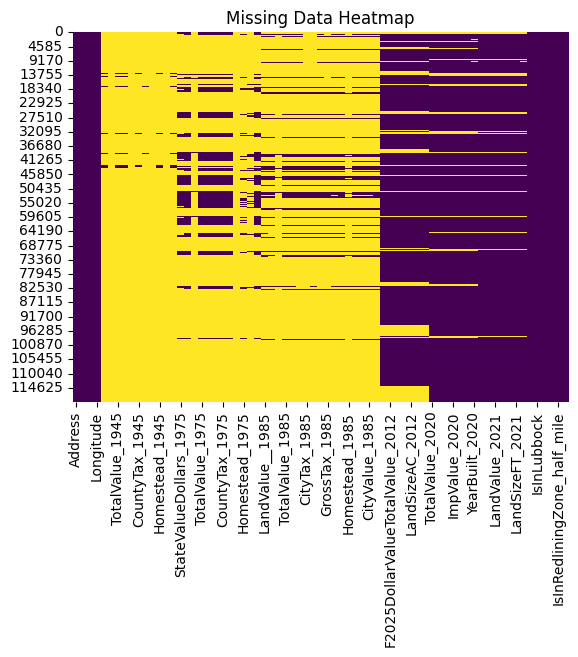

DistrictSchool_1945                100.000000
Area_1945                          100.000000
ValueOfPersonalProperty_1945        99.750805
StateTax_1945                       99.636696
Area_1975                           99.565378
ValueOfPersonalProperty_1975        99.108102
Homestead_1945                      99.056081
CountyTax_1945                      98.926869
GrossTax_1945                       98.910928
ValueOfCityProperty_1945            98.290878
F2025DollarValueTotalValue_1945     98.165861
TotalValue_1945                     98.165861
AddressRepetition_1945              98.088670
SpecialFeaturesValue_1985           95.837529
DistrictSchool_1975                 93.793630
Homestead_1985                      93.714760
Homestead_1975                      91.793362
CityTax_1985                        90.289804
SchoolTax_1985                      89.809035
GrossTax_1985                       89.672271
BuildingValue_1985                  89.571587
LCHDTax_1985                      

In [ ]:
# Visualizing missing data
sns.heatmap(df.isnull(), cbar=False, cmap='viridis')
plt.title('Missing Data Heatmap')
plt.show()

# Calculate percentage of missing data in each column
missing_data = df.isnull().sum() / len(df) * 100
missing_data = missing_data[missing_data > 0]
print(missing_data.sort_values(ascending=False))


### 2. Descriptive Statistics

In [ ]:
df[numerical_columns].describe()

,ValueOfCityProperty_1945,ValueOfPersonalProperty_1945,TotalValue_1945,F2025DollarValueTotalValue_1945,StateTax_1945,CountyTax_1945,GrossTax_1945,Area_1945,Homestead_1945,DistrictSchool_1945,AddressRepetition_1945,StateValueDollars_1975,ValueOfCityProperty_1975,ValueOfPersonalProperty_1975,TotalValue_1975,F2025DollarValueTotalValue_1975,StateTax_1975,CountyTax_1975,GrossTax_1975,Area_1975,Homestead_1975,DistrictSchool_1975,AddressRepetition_1975,LandValue__1985,BuildingValue_1985,SpecialFeaturesValue_1985,TotalValue_1985,F2025DollarValueTotalValue_1985,CountyTax_1985,CityTax_1985,SchoolTax_1985,LCHDTax_1985,GrossTax_1985,AreaSqm_1985,AreaSqft_1985,Homestead_1985,SchoolValue_1985,CountyValue_1985,CityValue_1985,AddressRepetition_1985,TotalValue_2012,F2025DollarValueTotalValue_2012,LandValue_2012,ImpValue_2012,LandSizeAC_2012,LandSizeFT_2012,YearBuilt_2012,TotalValue_2020,F2025DollarValueTotalValue_2020,LandValue_2020,ImpValue_2020,LandSizeAC_2020,LandSizeFT_2020,YearBuilt_2020,TotalValue_2021,F2025DollarValueTotalValue_2021,LandValue_2021,ImpValue_2021,LandSizeAC_2021,LandSizeFT_2021,YearBuilt_2021,IsInLubbock,IsInCouncilDistrict,IsInRedliningZone,IsInRedliningZone_half_mile,IsInRedliningZone_one_mile
count,2037.000000,297.000000,2186.000000,2186.000000,433.000000,1279.000000,1298.000000,0.0,1125.000000,0.0,2278.000000,2.261000e+04,2.634600e+04,1.063000e+03,2.634600e+04,2.634600e+04,25888.000000,25889.000000,2.588700e+04,5.180000e+02,9781.000000,7397.000000,26356.000000,13079.000000,1.242900e+04,4961.000000,1.325100e+04,1.325100e+04,12693.000000,11573.000000,12146.000000,12673.000000,12309.000000,13168.000000,13276.000000,7491.000000,1.293900e+04,1.288500e+04,1.282300e+04,13276.000000,9.959900e+04,9.959900e+04,9.959900e+04,9.959900e+04,99598.000000,9.959800e+04,99322.000000,1.108730e+05,1.108730e+05,1.108730e+05,1.108730e+05,110873.000000,1.108730e+05,110520.000000,1.130540e+05,1.130540e+05,1.130540e+05,1.130540e+05,113054.000000,1.130540e+05,112519.000000,119184.000000,119184.000000,119184.000000,119184.000000,119184.000000
mean,1869.676485,1649.191919,1933.193504,33888.882127,220.069654,202.014109,270.483382,NaN,1717.505778,NaN,1.170325,5.033710e+03,5.389043e+03,8.997565e+03,5.391270e+03,3.164675e+04,525.955501,4108.247673,8.831215e+03,8.905742e+04,2714.384010,8731.320265,1.526901,6555.967046,3.541368e+04,1581.834711,3.998035e+04,1.171424e+05,62.430744,226.775788,356.349141,42.541761,646.855921,328.690614,3509.219644,5054.581765,3.507516e+04,3.765463e+04,3.761003e+04,1.473712,1.396220e+05,1.912821e+05,1.894923e+04,1.206727e+05,2.302325,9.908272e+04,1729.703671,1.971406e+05,2.405116e+05,2.869377e+04,1.684469e+05,1.935436,8.164207e+04,1718.911274,2.122551e+05,2.462159e+05,2.894209e+04,1.833130e+05,1.909923,8.058195e+04,1663.081080,0.810444,2.723981,0.009657,0.049998,0.099023
std,1721.989536,4132.144103,2201.019324,38583.868742,742.806444,461.084108,805.428023,NaN,718.283440,NaN,0.512434,1.428359e+04,1.328992e+04,4.193054e+04,1.329282e+04,7.802886e+04,1568.150478,10464.917285,2.281798e+04,1.869605e+05,685.063311,16211.823011,3.453636,20612.335627,6.583214e+04,6834.511829,8.023713e+04,2.350948e+05,211.782741,490.647058,2778.363225,96.277689,1473.897690,247.393103,2671.021631,3425.536217,8.129847e+04,8.150506e+04,8.193501e+04,3.193683,6.906084e+05,9.461334e+05,9.957390e+04,6.242938e+05,103.482694,4.170205e+06,650.694083,9.194171e+05,1.121689e+06,1.545685e+05,8.434934e+05,30.098299,1.035304e+06,670.115933,9.536591e+05,1.106245e+06,1.531678e+05,8.788189e+05,29.780237,1.023813e+06,726.606247,0.391951,1.993501,0.097796,0.217942,0.298695
min,10.000000,50.000000,10.000000,175.300000,0.070000,0.050000,0.000000,NaN,4.000000,NaN,1.000000,0.000000e+00,1.000000e+01,0.000000e+00,1.000000e+01,5.870000e+01,0.000000,0.000000,0.000000e+00,3.000000e+01,0.000000,18.000000,1.000000,20.000000,2.000000e+02,10.000000,1.300000e+02,3.809000e+02,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,500.000000,0.000000e+00,0.000000e+00,0.000000e+0

### 3. Correlation Analysis

In [ ]:
# Correlation matrix
correlation_matrix = df[numerical_columns].corr()
plt.figure(figsize=(50, 50))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()


Output hidden; open in https://colab.research.google.com to view.

In [ ]:
correlation_matrix

,ValueOfCityProperty_1945,ValueOfPersonalProperty_1945,TotalValue_1945,F2025DollarValueTotalValue_1945,StateTax_1945,CountyTax_1945,GrossTax_1945,Area_1945,Homestead_1945,DistrictSchool_1945,AddressRepetition_1945,StateValueDollars_1975,ValueOfCityProperty_1975,ValueOfPersonalProperty_1975,TotalValue_1975,F2025DollarValueTotalValue_1975,StateTax_1975,CountyTax_1975,GrossTax_1975,Area_1975,Homestead_1975,DistrictSchool_1975,AddressRepetition_1975,LandValue__1985,BuildingValue_1985,SpecialFeaturesValue_1985,TotalValue_1985,F2025DollarValueTotalValue_1985,CountyTax_1985,CityTax_1985,SchoolTax_1985,LCHDTax_1985,GrossTax_1985,AreaSqm_1985,AreaSqft_1985,Homestead_1985,SchoolValue_1985,CountyValue_1985,CityValue_1985,AddressRepetition_1985,TotalValue_2012,F2025DollarValueTotalValue_2012,LandValue_2012,ImpValue_2012,LandSizeAC_2012,LandSizeFT_2012,YearBuilt_2012,TotalValue_2020,F2025DollarValueTotalValue_2020,LandValue_2020,ImpValue_2020,LandSizeAC_2020,LandSizeFT_2020,YearBuilt_2020,TotalValue_2021,F2025DollarValueTotalValue_2021,LandValue_2021,ImpValue_2021,LandSizeAC_2021,LandSizeFT_2021,YearBuilt_2021,IsInLubbock,IsInCouncilDistrict,IsInRedliningZone,IsInRedliningZone_half_mile,IsInRedliningZone_one_mile
ValueOfCityProperty_1945,1.000000,0.356040,0.888434,0.888434,0.150647,0.144105,0.184975,NaN,0.861728,NaN,0.177869,0.141356,0.185977,0.557579,0.185977,0.185977,0.164781,0.182171,0.179390,0.245149,0.487345,0.037361,0.057894,0.152359,0.126626,0.106419,0.161070,0.161070,0.163190,0.168854,0.162469,0.162138,0.157423,-0.000501,-0.000529,NaN,0.154097,0.158749,0.158596,0.008561,0.176996,0.176996,0.190587,0.162329,0.092621,0.065682,0.069032,0.094709,0.094709,0.192042,0.085357,0.062299,0.057338,0.056555,0.099903,0.099903,0.192040,0.090610,0.062476,0.057508,0.004583,0.034724,0.068323,-0.055167,-0.089779,-0.039526
ValueOfPersonalProperty_1945,0.356040,1.000000,0.901070,0.901070,0.162776,0.096017,0.178544,NaN,0.190227,NaN,0.037641,-0.028095,-0.016218,-0.044405,-0.016218,-0.016218,0.005493,-0.003355,-0.002595,-1.000000,0.225360,-0.078942,-0.059030,0.159121,0.197320,0.432771,0.192870,0.192870,0.203616,0.203692,0.208602,0.202704,0.188661,-0.084246,-0.084269,NaN,0.207596,0.203692,0.203616,-0.024620,0.149353,0.149353,0.160246,0.128190,0.027496,-0.039076,-0.037989,0.210481,0.210481,0.120058,0.209047,-0.013561,-0.013572,-0.109066,0.161977,0.161977,0.120237,0.156161,-0.014396,-0.014406,-0.291850,-0.153073,-0.144932,0.011292,0.142195,0.009622
TotalValue_1945,0.888434,0.901070,1.000000,1.000000,0.150441,0.121653,0.210119,NaN,0.856316,NaN,0.145438,0.077587,0.108651,0.101024,0.108651,0.108651,0.103964,0.107596,0.106411,0.245149,0.470252,0.034255,0.024935,0.122095,0.099033,0.099165,0.125866,0.125866,0.128263,0.131399,0.128264,0.127197,0.123772,-0.033859,-0.033598,NaN,0.123768,0.125892,0.125775,-0.013184,0.163231,0.163231,0.172021,0.149708,0.075358,0.049368,0.051866,0.092996,0.092996,0.171035,0.084353,0.049483,0.045302,0.033490,0.093641,0.093641,0.171080,0.084961,0.049682,0.045492,-0.035829,-0.015751,0.026375,-0.041382,-0.033931,-0.019941
F2025DollarValueTotalValue_1945,0.888434,0.901070,1.000000,1.000000,0.150441,0.121653,0.210119,NaN,0.856316,NaN,0.145438,0.077587,0.108651,0.101024,0.108651,0.108651,0.103964,0.107596,0.106411,0.245149,0.470252,0.034255,0.024935,0.122095,0.099033,0.099165,0.125866,0.125866,0.128263,0.131399,0.128264,0.127197,0.123772,-0.033859,-0.033598,NaN,0.123768,0.125892,0.125775,-0.013184,0.163231,0.163231,0.172021,0.149708,0.075358,0.049368,0.051866,0.092996,0.092996,0.171035,0.084353,0.049483,0.045302,0.033490,0.093641,0.093641,0.171080,0.084961,0.049682,0.045492,-0.035829,-0.015751,0.026375,-0.041382,-0.033931,-0.019941
StateTax_1945,0.150647,0.162776,0.150441,0.150441,1.000000,0.818121,0.966274,NaN,0.129615,NaN,-0.047074,-0.011151,0.000231,0.046175,0.000231,0.000231,0.007036,0.008390,0.006153,-0.620980,0.089245,-0.055710,-0.083591,-0.133964,-0.071464,-0.130054,-0.075235,-0.075235,-0.075019,-0.078294,-0.079142,-0.084197,-0.066914,-0

In [ ]:
# Count of properties per ZipCode
zipcode_counts = df['ZipCode'].value_counts()
zipcode_counts

,count
ZipCode,
79424,21055
79423,16982
79416,11160
79403,9124
79413,8137
79407,6891
79404,6045
79415,5502
79412,5070


## Step 4: Basic Data Understanding

How many properties are in the dataset in total, and how many are within Lubbock city limits?

Total properties in the dataset: 119184
Properties within Lubbock city limits: 96592

Table: Property Counts
                Category   Count
0       Total Properties  119184
1  Properties in Lubbock   96592


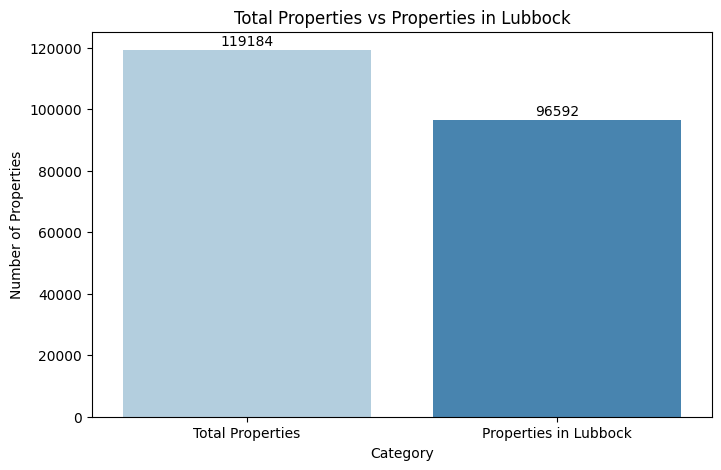

In [ ]:
# Total properties in the dataset
total_properties = len(df)
print(f"Total properties in the dataset: {total_properties}")

# Properties within Lubbock city limits
lubbock_data = df[df['IsInLubbock'] == 1]
properties_in_lubbock = len(lubbock_data)
print(f"Properties within Lubbock city limits: {properties_in_lubbock}")

# Create a table for visualization
counts_table = pd.DataFrame({
    'Category': ['Total Properties', 'Properties in Lubbock'],
    'Count': [total_properties, properties_in_lubbock]
})
print("\nTable: Property Counts")
print(counts_table)

# Visualize the counts with a bar plot
plt.figure(figsize=(8, 5))
sns.barplot(x='Category', y='Count', data=counts_table, palette='Blues')
plt.title('Total Properties vs Properties in Lubbock')
plt.xlabel('Category')
plt.ylabel('Number of Properties')
for i, count in enumerate(counts_table['Count']):
    plt.text(i, count + 500, f'{count}', ha='center', va='bottom')
plt.show()


Table: Data Availability by Year (Overall)
      Properties with Data
Year                      
1945                  2186
1975                 26346
1985                 13251
2012                 99599
2020                110873
2021                113054


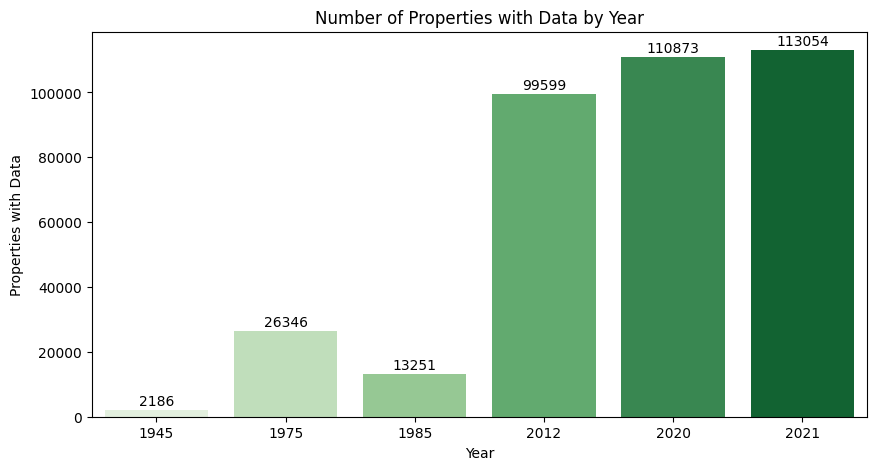

In [ ]:
# Define the years with TotalValue data
years = ['1945', '1975', '1985', '2012', '2020', '2021']

# Calculate non-null counts for TotalValue_{year} (data availability)
data_availability = {}
for year in years:
    total_value_col = f'TotalValue_{year}'
    non_null_count = df[total_value_col].notna().sum()
    data_availability[year] = non_null_count

# Create a table for overall data availability
availability_table = pd.DataFrame.from_dict(data_availability, orient='index', columns=['Properties with Data'])
availability_table.index.name = 'Year'
print("\nTable: Data Availability by Year (Overall)")
print(availability_table)

# Visualize data availability over years
plt.figure(figsize=(10, 5))
sns.barplot(x=availability_table.index, y='Properties with Data', data=availability_table, palette='Greens')
plt.title('Number of Properties with Data by Year')
plt.xlabel('Year')
plt.ylabel('Properties with Data')
for i, count in enumerate(availability_table['Properties with Data']):
    plt.text(i, count + 500, f'{count}', ha='center', va='bottom')
plt.show()


Table: Data Availability by District and Year
            1945  1975  1985   2012   2020   2021
District                                         
District 1  1553  5607  3017  14582  14425  14517
District 2   144  6987  3907  18288  18845  18872
District 3   364  8291  2746  13189  13222  13226
District 4     1  2649  1287  13716  17113  17642
District 5     0   214   324  11255  15386  15820
District 6    15  1737   700  11004  11710  12315


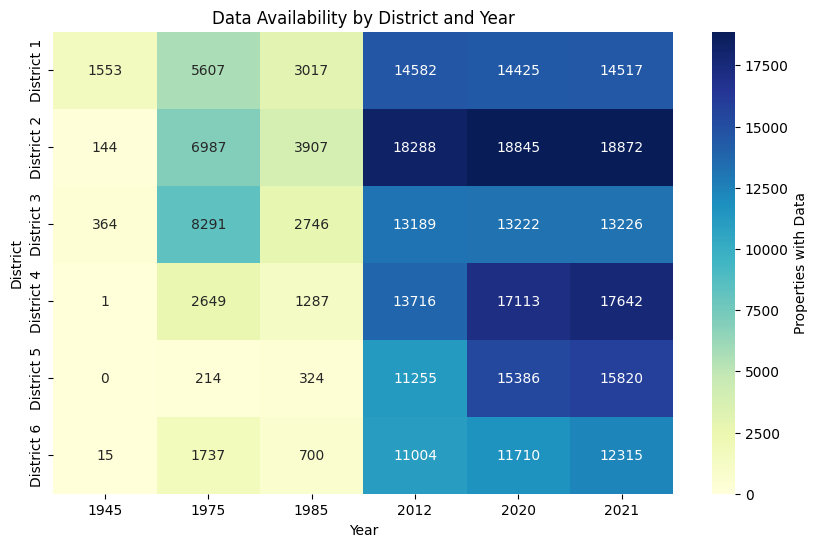

In [ ]:
# Filter for Lubbock data
lubbock_data = df[df['IsInLubbock'] == 1]

# Data availability by district
availability_by_district = {}
for district in range(1, 7):
    district_data = lubbock_data[lubbock_data['IsInCouncilDistrict'] == district]
    district_counts = {}
    for year in years:
        total_value_col = f'TotalValue_{year}'
        district_counts[year] = district_data[total_value_col].notna().sum()
    availability_by_district[f'District {district}'] = district_counts

# Create a DataFrame
availability_district_df = pd.DataFrame(availability_by_district).T
availability_district_df.index.name = 'District'
print("\nTable: Data Availability by District and Year")
print(availability_district_df)

# Visualize as a heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(availability_district_df, annot=True, fmt='d', cmap='YlGnBu', cbar_kws={'label': 'Properties with Data'})
plt.title('Data Availability by District and Year')
plt.xlabel('Year')
plt.ylabel('District')
plt.show()


Table: Data Availability by Zone and Year
                  1945   1975  1985   2012   2020   2021
ZoneCategory                                            
Redlining Zone      83    270    85    924    875    876
Half-mile Buffer   654   1834   835   5037   4892   4887
One-mile Buffer    520   2217  1335   5369   5344   5349
Outside Both       820  21164  9726  70704  79590  81280


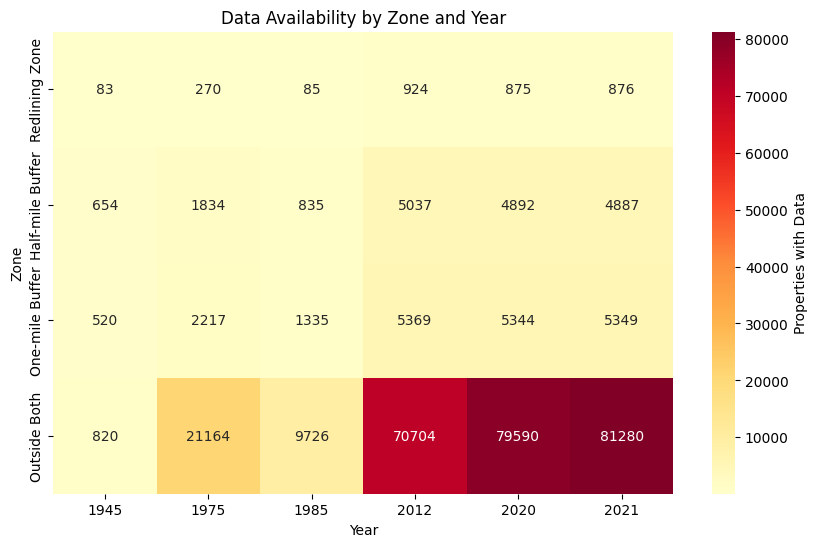

In [ ]:
# Define zone categories based on binary columns
def get_zone(row):
    if row['IsInRedliningZone'] == 1:
        return 'Redlining Zone'
    elif row['IsInRedliningZone_half_mile'] == 1:
        return 'Half-mile Buffer'
    elif row['IsInRedliningZone_one_mile'] == 1:
        return 'One-mile Buffer'
    else:
        return 'Outside Both'

lubbock_data['ZoneCategory'] = lubbock_data.apply(get_zone, axis=1)
zones = ['Redlining Zone', 'Half-mile Buffer', 'One-mile Buffer', 'Outside Both']

# Data availability by zone
availability_by_zone = {}
for zone in zones:
    zone_data = lubbock_data[lubbock_data['ZoneCategory'] == zone]
    zone_counts = {}
    for year in years:
        total_value_col = f'TotalValue_{year}'
        zone_counts[year] = zone_data[total_value_col].notna().sum()
    availability_by_zone[zone] = zone_counts

# Create a DataFrame
availability_zone_df = pd.DataFrame(availability_by_zone).T
availability_zone_df.index.name = 'ZoneCategory'
print("\nTable: Data Availability by Zone and Year")
print(availability_zone_df)

# Visualize as a heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(availability_zone_df, annot=True, fmt='d', cmap='YlOrRd', cbar_kws={'label': 'Properties with Data'})
plt.title('Data Availability by Zone and Year')
plt.xlabel('Year')
plt.ylabel('Zone')
plt.show()


Table: Data Availability by District, Zone, and Year
                               1945  1975  1985   2012   2020   2021
District_Zone                                                       
District 1 - Redlining Zone      59   207    57    636    593    596
District 1 - Half-mile Buffer   588  1422   665   3799   3642   3636
District 1 - One-mile Buffer    507  1327   908   3415   3392   3390
District 1 - Outside Both       399  2651  1387   6732   6798   6895
District 2 - Redlining Zone      24    63    28    288    282    280
District 2 - Half-mile Buffer    36   389   140   1235   1247   1248
District 2 - One-mile Buffer     13   889   427   1952   1950   1957
District 2 - Outside Both        71  5646  3312  14813  15366  15387
District 3 - Redlining Zone       0     0     0      0      0      0
District 3 - Half-mile Buffer    30    23    30      3      3      3
District 3 - One-mile Buffer      0     1     0      2      2      2
District 3 - Outside Both       334  8267  2716  

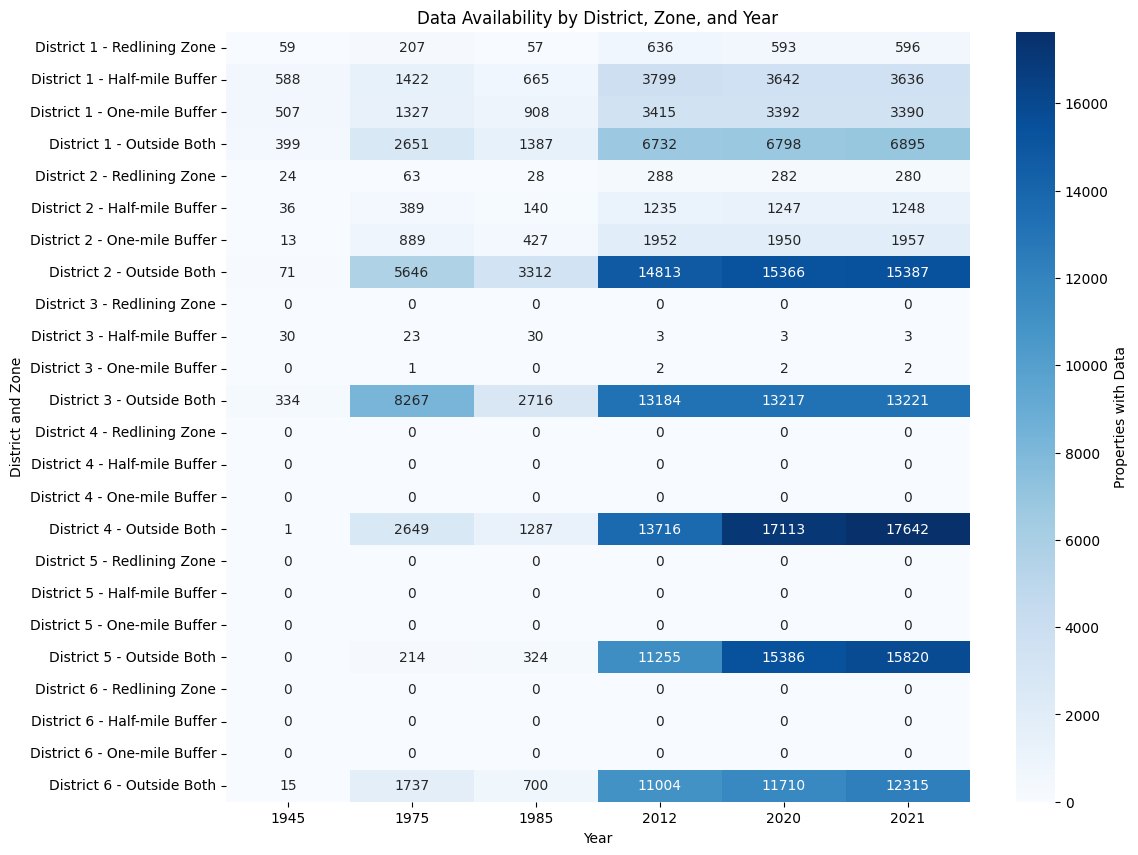

In [ ]:
# Data availability by district and zone
availability_district_zone = {}
for district in range(1, 7):
    for zone in zones:
        key = f'District {district} - {zone}'
        subset = lubbock_data[(lubbock_data['IsInCouncilDistrict'] == district) & (lubbock_data['ZoneCategory'] == zone)]
        counts = {}
        for year in years:
            total_value_col = f'TotalValue_{year}'
            counts[year] = subset[total_value_col].notna().sum()
        availability_district_zone[key] = counts

# Create a DataFrame
availability_district_zone_df = pd.DataFrame(availability_district_zone).T
availability_district_zone_df.index.name = 'District_Zone'
print("\nTable: Data Availability by District, Zone, and Year")
print(availability_district_zone_df)

# Visualize as a heatmap (subset if too large)
plt.figure(figsize=(12, 10))
sns.heatmap(availability_district_zone_df, annot=True, fmt='d', cmap='Blues', cbar_kws={'label': 'Properties with Data'})
plt.title('Data Availability by District, Zone, and Year')
plt.xlabel('Year')
plt.ylabel('District and Zone')
plt.show()

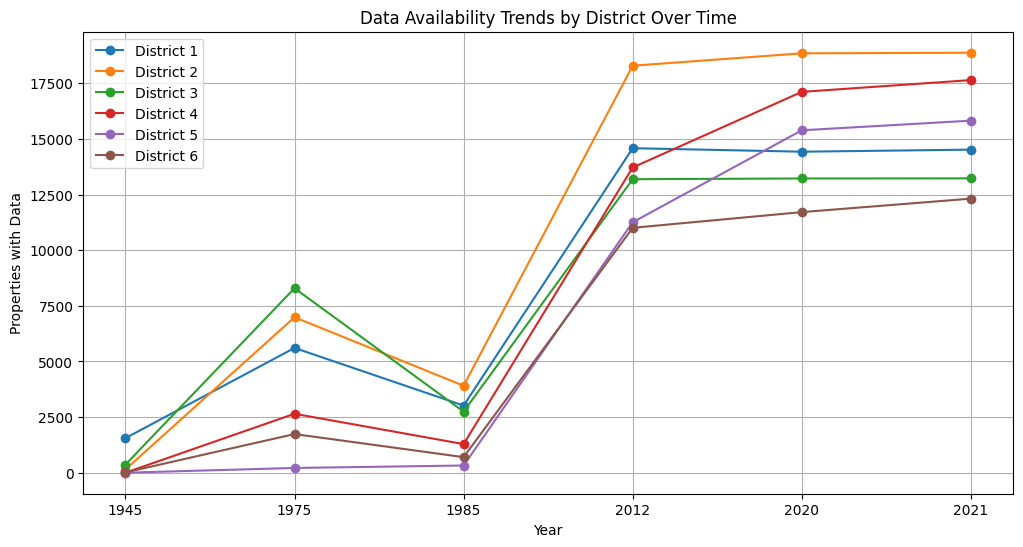

In [ ]:
plt.figure(figsize=(12, 6))
for district in availability_district_df.index:
    plt.plot(years, availability_district_df.loc[district], marker='o', label=district)
plt.title('Data Availability Trends by District Over Time')
plt.xlabel('Year')
plt.ylabel('Properties with Data')
plt.legend()
plt.grid()
plt.show()

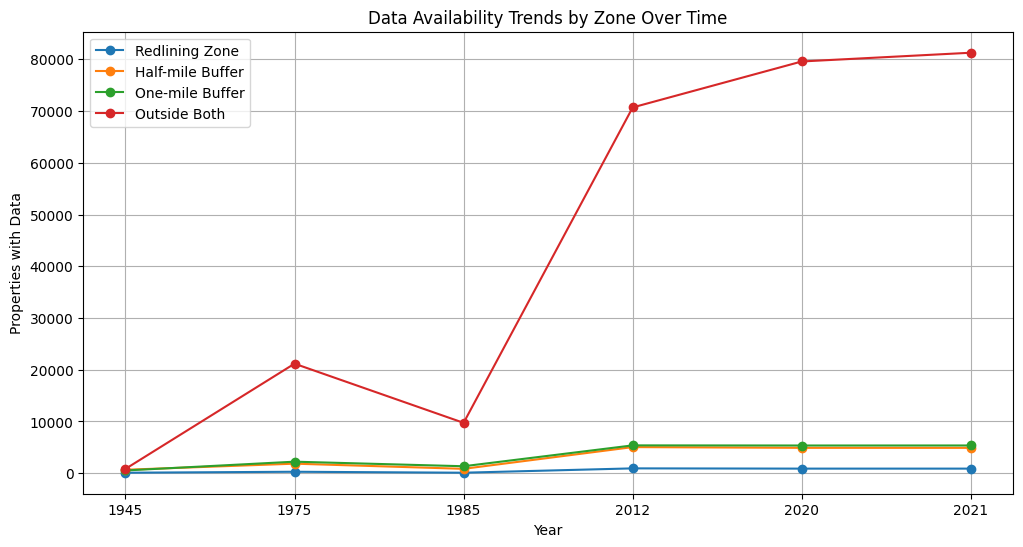

In [ ]:
plt.figure(figsize=(12, 6))
for zone in availability_zone_df.index:
    plt.plot(years, availability_zone_df.loc[zone], marker='o', label=zone)
plt.title('Data Availability Trends by Zone Over Time')
plt.xlabel('Year')
plt.ylabel('Properties with Data')
plt.legend()
plt.grid()
plt.show()


Table: Property Value Statistics by District and Year (Without Outliers)
                Avg_1945  Max_1945  Min_1945  Count_1945      Avg_1975  Max_1975  Min_1975  \
District                                                                                     
District 1  28091.574571   54343.0    2629.5      1400.0  13894.503708   34398.2      58.7   
District 2  22601.441259   63108.0     350.6       143.0  21169.252893   58876.1      58.7   
District 3  36231.684269   63108.0   11394.5       335.0  26530.935451   61165.4     234.8   
District 4  78885.000000   78885.0   78885.0         1.0  47373.843221   82414.8   14381.5   
District 5           NaN       NaN       NaN         0.0  57411.323196   76192.6   42440.1   
District 6  21818.107692   43825.0    2629.5        13.0  32899.414616   60402.3    7572.3   

            Count_1975       Avg_1985   Max_1985  Min_1985  Count_1985       Avg_2012   Max_2012  \
District                                                                 

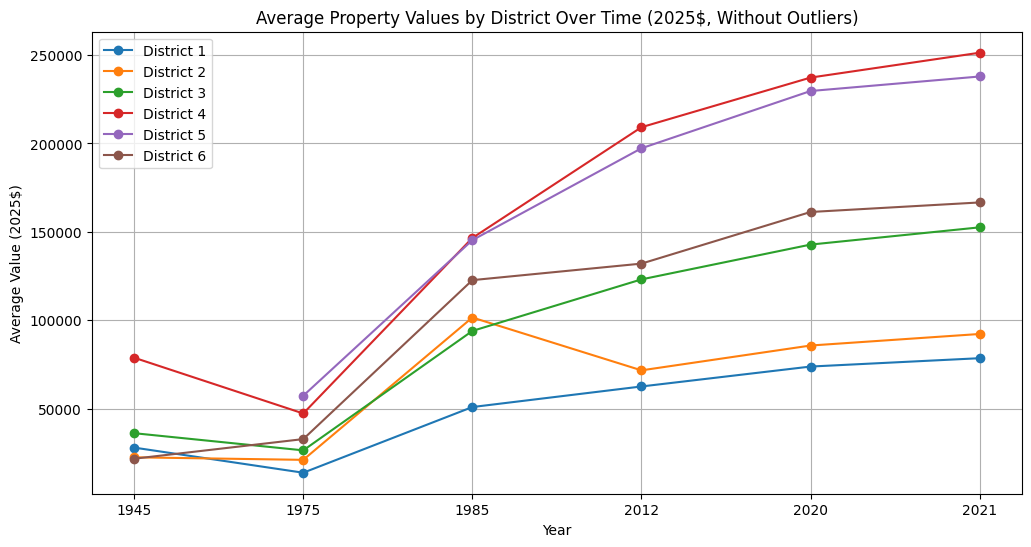

In [ ]:
# Filter for Lubbock
lubbock_data = df[df['IsInLubbock'] == 1]

# Define function to remove outliers using IQR
def remove_outliers(series):
    Q1 = series.quantile(0.25)
    Q3 = series.quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    return series[(series >= lower_bound) & (series <= upper_bound)]

# Calculate stats for each district and year
years = ['1945', '1975', '1985', '2012', '2020', '2021']
stats_by_district = {}

for district in range(1, 7):
    district_data = lubbock_data[lubbock_data['IsInCouncilDistrict'] == district]
    stats = {}
    for year in years:
        value_col = f'F2025DollarValueTotalValue_{year}'
        if value_col in district_data.columns:
            valid_data = district_data[value_col].dropna()
            if not valid_data.empty:
                # Remove outliers
                cleaned_data = remove_outliers(valid_data)
                stats[f'Avg_{year}'] = cleaned_data.mean()
                stats[f'Max_{year}'] = cleaned_data.max()
                stats[f'Min_{year}'] = cleaned_data.min()
                stats[f'Count_{year}'] = len(cleaned_data)
            else:
                stats[f'Avg_{year}'] = np.nan
                stats[f'Max_{year}'] = np.nan
                stats[f'Min_{year}'] = np.nan
                stats[f'Count_{year}'] = 0
    stats_by_district[f'District {district}'] = stats

# Convert to DataFrame
stats_df = pd.DataFrame(stats_by_district).T
stats_df.index.name = 'District'
print("\nTable: Property Value Statistics by District and Year (Without Outliers)")
print(stats_df)

# Save to CSV
stats_df.to_csv('property_value_stats_by_district.csv')

# Visualize average values over time
plt.figure(figsize=(12, 6))
for district in stats_df.index:
    avg_values = [stats_df.loc[district, f'Avg_{year}'] for year in years]
    plt.plot(years, avg_values, marker='o', label=district)
plt.title('Average Property Values by District Over Time (2025$, Without Outliers)')
plt.xlabel('Year')
plt.ylabel('Average Value (2025$)')
plt.legend()
plt.grid()
plt.show()

In [ ]:
# Define function to assign ZoneCategory
def get_zone(row):
    if row['IsInRedliningZone'] == 1:
        return 'Redlining Zone'
    elif row['IsInRedliningZone_half_mile'] == 1:
        return 'Half-mile Buffer'
    elif row['IsInRedliningZone_one_mile'] == 1:
        return 'One-mile Buffer'
    else:
        return 'Outside Both'

# Apply the function to create ZoneCategory
lubbock_data['ZoneCategory'] = lubbock_data.apply(get_zone, axis=1)

# Verify the new column
print("First few rows with ZoneCategory:")
print(lubbock_data[['IsInRedliningZone', 'IsInRedliningZone_half_mile', 'IsInRedliningZone_one_mile', 'ZoneCategory']].head())
print("\nUnique Zone Categories:")
print(lubbock_data['ZoneCategory'].unique())

First few rows with ZoneCategory:
     IsInRedliningZone  IsInRedliningZone_half_mile  IsInRedliningZone_one_mile      ZoneCategory
647                  1                            0                           0    Redlining Zone
723                  0                            1                           1  Half-mile Buffer
768                  1                            0                           0    Redlining Zone
821                  0                            1                           1  Half-mile Buffer
824                  1                            0                           0    Redlining Zone

Unique Zone Categories:
['Redlining Zone' 'Half-mile Buffer' 'Outside Both' 'One-mile Buffer']



Table: Property Value Statistics by Zone and Year (Without Outliers)
                      Avg_1945  Max_1945  Min_1945  Count_1945      Avg_1975  Max_1975  Min_1975  \
ZoneCategory                                                                                       
Redlining Zone    18509.882051   63108.0     175.3        78.0  15159.338528   69676.9     117.4   
Half-mile Buffer  22475.488264   57849.0     350.6       605.0  11210.970354   28234.7      58.7   
One-mile Buffer   32138.459267   57849.0    6135.5       464.0  12990.407685   31111.0      58.7   
Outside Both      33728.201216   61355.0    6310.8       765.0  28070.921776   75605.6      58.7   

                  Count_1975       Avg_1985  Max_1985  Min_1985  Count_1985       Avg_2012  \
ZoneCategory                                                                                 
Redlining Zone         231.0   81983.165513  336334.7    1201.3        78.0   51553.589889   
Half-mile Buffer      1609.0   40351.279253  10

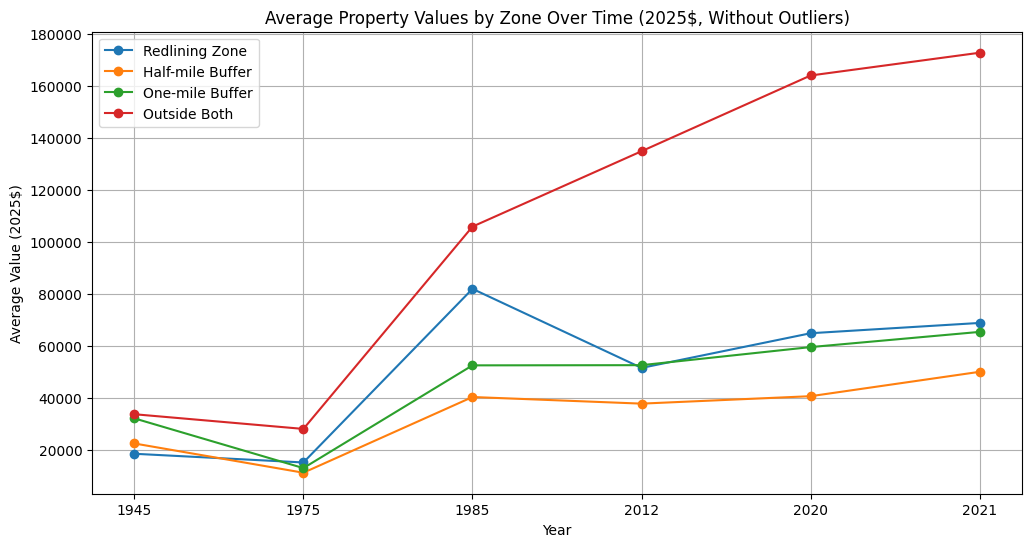

In [ ]:
# Define function to remove outliers using IQR
def remove_outliers(series):
    Q1 = series.quantile(0.25)
    Q3 = series.quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    return series[(series >= lower_bound) & (series <= upper_bound)]

# Define years
years = ['1945', '1975', '1985', '2012', '2020', '2021']

# Calculate stats for each zone and year
zones = ['Redlining Zone', 'Half-mile Buffer', 'One-mile Buffer', 'Outside Both']
stats_by_zone = {}

for zone in zones:
    zone_data = lubbock_data[lubbock_data['ZoneCategory'] == zone]
    stats = {}
    for year in years:
        value_col = f'F2025DollarValueTotalValue_{year}'
        if value_col in zone_data.columns:
            valid_data = zone_data[value_col].dropna()
            if not valid_data.empty:
                cleaned_data = remove_outliers(valid_data)
                stats[f'Avg_{year}'] = cleaned_data.mean()
                stats[f'Max_{year}'] = cleaned_data.max()
                stats[f'Min_{year}'] = cleaned_data.min()
                stats[f'Count_{year}'] = len(cleaned_data)
            else:
                stats[f'Avg_{year}'] = np.nan
                stats[f'Max_{year}'] = np.nan
                stats[f'Min_{year}'] = np.nan
                stats[f'Count_{year}'] = 0
    stats_by_zone[zone] = stats

# Convert to DataFrame
stats_zone_df = pd.DataFrame(stats_by_zone).T
stats_zone_df.index.name = 'ZoneCategory'
print("\nTable: Property Value Statistics by Zone and Year (Without Outliers)")
print(stats_zone_df)

# Save to CSV
stats_zone_df.to_csv('property_value_stats_by_zone.csv')

# Visualize average values over time
plt.figure(figsize=(12, 6))
for zone in stats_zone_df.index:
    avg_values = [stats_zone_df.loc[zone, f'Avg_{year}'] for year in years]
    plt.plot(years, avg_values, marker='o', label=zone)
plt.title('Average Property Values by Zone Over Time (2025$, Without Outliers)')
plt.xlabel('Year')
plt.ylabel('Average Value (2025$)')
plt.legend()
plt.grid()
plt.show()


Table: Property Value Statistics by District, Zone, and Year (Without Outliers)
                                   Avg_1945  Max_1945  Min_1945  Count_1945      Avg_1975  \
District_Zone                                                                               
District 1 - Redlining Zone    15132.028302   52590.0     175.3        53.0  15136.773333   
District 1 - Half-mile Buffer  22880.917603   55219.5     350.6       534.0  11309.564791   
District 1 - One-mile Buffer   32516.277137   61355.0    5259.0       468.0  13910.505937   
District 1 - Outside Both      32419.190323   52590.0    8765.0       372.0  15148.675519   
District 2 - Redlining Zone    24111.054167   63108.0     350.6        24.0  15484.139216   
District 2 - Half-mile Buffer   8671.871875   28048.0     525.9        32.0  10438.261791   
District 2 - One-mile Buffer   26537.723077   52590.0   10518.0        13.0  11873.198810   
District 2 - Outside Both      27158.978571   52590.0    1753.0        70.0  23447

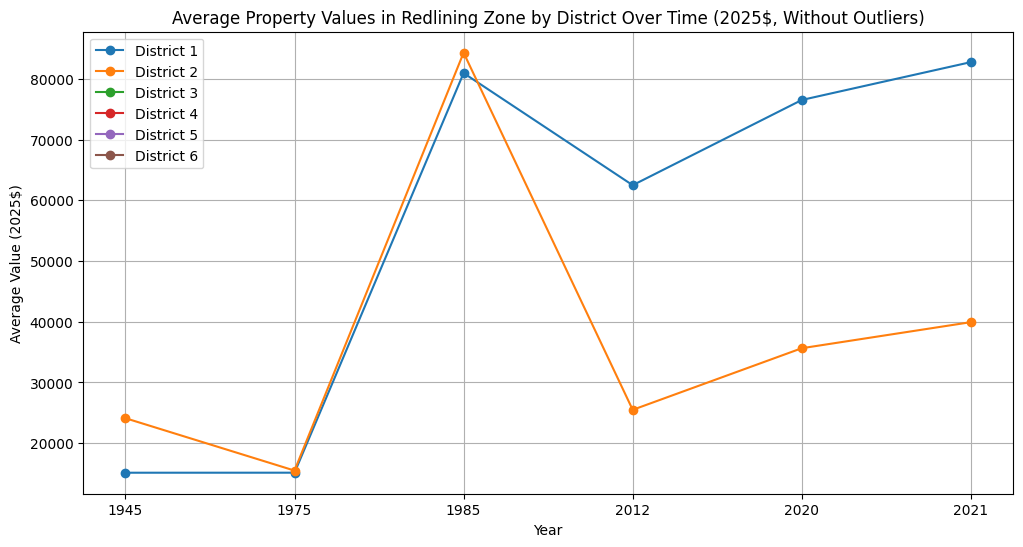

In [ ]:
# Calculate stats for each district-zone combination
stats_by_district_zone = {}
for district in range(1, 7):
    for zone in zones:
        key = f'District {district} - {zone}'
        subset = lubbock_data[(lubbock_data['IsInCouncilDistrict'] == district) & (lubbock_data['ZoneCategory'] == zone)]
        stats = {}
        for year in years:
            value_col = f'F2025DollarValueTotalValue_{year}'
            if value_col in subset.columns:
                valid_data = subset[value_col].dropna()
                if not valid_data.empty:
                    cleaned_data = remove_outliers(valid_data)
                    stats[f'Avg_{year}'] = cleaned_data.mean()
                    stats[f'Max_{year}'] = cleaned_data.max()
                    stats[f'Min_{year}'] = cleaned_data.min()
                    stats[f'Count_{year}'] = len(cleaned_data)
                else:
                    stats[f'Avg_{year}'] = np.nan
                    stats[f'Max_{year}'] = np.nan
                    stats[f'Min_{year}'] = np.nan
                    stats[f'Count_{year}'] = 0
        stats_by_district_zone[key] = stats

# Convert to DataFrame
stats_district_zone_df = pd.DataFrame(stats_by_district_zone).T
stats_district_zone_df.index.name = 'District_Zone'
print("\nTable: Property Value Statistics by District, Zone, and Year (Without Outliers)")
print(stats_district_zone_df)

# Save to CSV
stats_district_zone_df.to_csv('property_value_stats_by_district_zone.csv')

# Visualize averages for a subset (e.g., Redlining Zone across districts)
plt.figure(figsize=(12, 6))
for district in range(1, 7):
    key = f'District {district} - Redlining Zone'
    if key in stats_district_zone_df.index:
        avg_values = [stats_district_zone_df.loc[key, f'Avg_{year}'] for year in years]
        plt.plot(years, avg_values, marker='o', label=f'District {district}')
plt.title('Average Property Values in Redlining Zone by District Over Time (2025$, Without Outliers)')
plt.xlabel('Year')
plt.ylabel('Average Value (2025$)')
plt.legend()
plt.grid()
plt.show()


Table: Growth Rates in Average Property Values by District (%)
            1945-1975   1975-1985  1985-2012  2012-2020  2020-2021
District                                                          
District 1 -50.538537  267.134281  22.792756  17.965768   6.390772
District 2  -6.336713  379.946809 -29.384190  19.552909   7.605999
District 3 -26.774214  254.369134  30.984537  15.969921   6.821062
District 4 -39.945689  209.351469  42.710325  13.409784   5.924509
District 5        NaN  153.137915  35.722149  16.405561   3.573103
District 6  50.789496  273.041222   7.606549  22.091067   3.345320


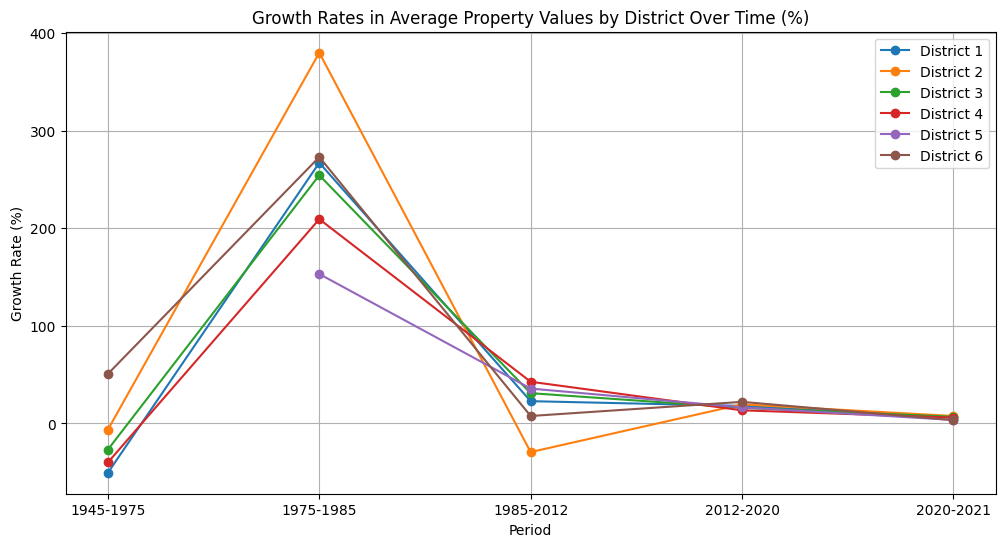

In [ ]:
# Calculate growth rates between consecutive years by district
growth_rates = {}
for district in stats_df.index:
    growth = {}
    for i in range(len(years) - 1):
        year1, year2 = years[i], years[i+1]
        avg1 = stats_df.loc[district, f'Avg_{year1}']
        avg2 = stats_df.loc[district, f'Avg_{year2}']
        if pd.notna(avg1) and pd.notna(avg2) and avg1 != 0:
            growth[f'{year1}-{year2}'] = ((avg2 - avg1) / avg1) * 100
        else:
            growth[f'{year1}-{year2}'] = np.nan
    growth_rates[district] = growth

# Convert to DataFrame
growth_df = pd.DataFrame(growth_rates).T
growth_df.index.name = 'District'
print("\nTable: Growth Rates in Average Property Values by District (%)")
print(growth_df)

# Visualize growth rates
plt.figure(figsize=(12, 6))
for district in growth_df.index:
    plt.plot(growth_df.columns, growth_df.loc[district], marker='o', label=district)
plt.title('Growth Rates in Average Property Values by District Over Time (%)')
plt.xlabel('Period')
plt.ylabel('Growth Rate (%)')
plt.legend()
plt.grid()
plt.show()

In [ ]:
# Define years to process
years = ['1985', '2012', '2020', '2021']

# Function to calculate price per square foot
def calculate_price_per_sqft(row, year):
    value_col = f'F2025DollarValueTotalValue_{year}'
    size_col = 'AreaSqft_1985' if year == '1985' else f'LandSizeFT_{year}'

    if pd.notna(row[value_col]) and pd.notna(row[size_col]) and row[size_col] > 0:
        return row[value_col] / row[size_col]
    return np.nan

# Add columns for specified years
for year in years:
    lubbock_data[f'parcel_price_per_sqft_{year}'] = lubbock_data.apply(
        lambda row: calculate_price_per_sqft(row, year), axis=1
    )

# Conversion factor: 1 acre = 43,560 square feet
ACRE_TO_SQFT = 43560

# Recalculate parcel_price_per_sqft_1975 with Area_1975 in acres
lubbock_data['parcel_price_per_sqft_1975'] = lubbock_data.apply(
    lambda row: row['F2025DollarValueTotalValue_1975'] / (row['Area_1975'] * ACRE_TO_SQFT)
    if pd.notna(row['F2025DollarValueTotalValue_1975']) and pd.notna(row['Area_1975']) and row['Area_1975'] > 0
    else np.nan,
    axis=1
)

In [ ]:
# Inspect the first few rows to confirm new columns
print("First few rows with parcel_price_per_sqft columns:")
print(lubbock_data[['F2025DollarValueTotalValue_1985', 'AreaSqft_1985', 'parcel_price_per_sqft_1985',
                    'F2025DollarValueTotalValue_2012', 'LandSizeFT_2012', 'parcel_price_per_sqft_2012',
                    'F2025DollarValueTotalValue_2020', 'LandSizeFT_2020', 'parcel_price_per_sqft_2020',
                    'F2025DollarValueTotalValue_2021', 'LandSizeFT_2021', 'parcel_price_per_sqft_2021',
                    'F2025DollarValueTotalValue_1975', 'Area_1975', 'parcel_price_per_sqft_1975']].head())

# Check info to see non-null counts
print("\nDataFrame Info with new columns:")
print(lubbock_data.info())

First few rows with parcel_price_per_sqft columns:
     F2025DollarValueTotalValue_1985  AreaSqft_1985  parcel_price_per_sqft_1985  \
647                              NaN            NaN                         NaN   
723                              NaN            NaN                         NaN   
768                           3516.0         1173.0                    2.997442   
821                              NaN            NaN                         NaN   
824                              NaN            NaN                         NaN   

     F2025DollarValueTotalValue_2012  LandSizeFT_2012  parcel_price_per_sqft_2012  \
647                          1781.00           2600.0                    0.685000   
723                         51635.30           8125.0                    6.355114   
768                          1182.31           2875.0                    0.411238   
821                        274548.00          51350.0                    5.346602   
824                      


Table: Number of Properties with Valid parcel_price_per_sqft by Year
      Non_Null_Count
Year                
1975             401
1985           11896
2012           80341
2020           89130
2021           90763


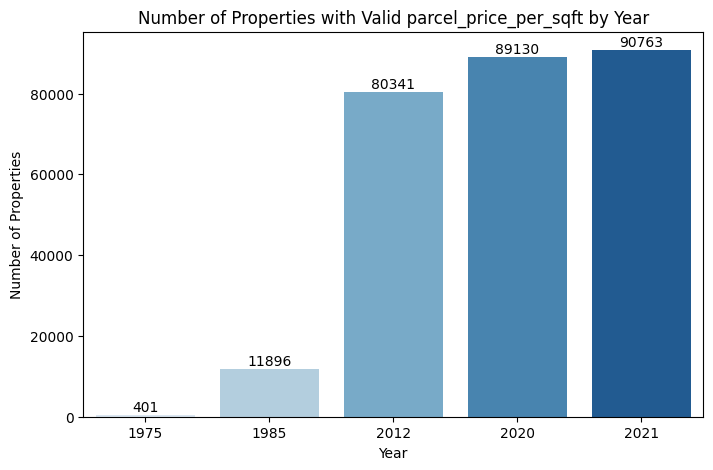

In [ ]:
# Define years to check
years = ['1975', '1985', '2012', '2020', '2021']

# Calculate non-null counts for each price per sqft column
price_per_sqft_counts = {}
for year in years:
    col = f'parcel_price_per_sqft_{year}'
    price_per_sqft_counts[year] = lubbock_data[col].notna().sum()

# Create a table
price_per_sqft_df = pd.DataFrame.from_dict(price_per_sqft_counts, orient='index', columns=['Non_Null_Count'])
price_per_sqft_df.index.name = 'Year'
print("\nTable: Number of Properties with Valid parcel_price_per_sqft by Year")
print(price_per_sqft_df)

# Visualize with a bar plot
plt.figure(figsize=(8, 5))
sns.barplot(x=price_per_sqft_df.index, y='Non_Null_Count', data=price_per_sqft_df, palette='Blues')
plt.title('Number of Properties with Valid parcel_price_per_sqft by Year')
plt.xlabel('Year')
plt.ylabel('Number of Properties')
for i, count in enumerate(price_per_sqft_df['Non_Null_Count']):
    plt.text(i, count + 100, f'{count}', ha='center', va='bottom')
plt.show()


Table: Statistics of parcel_price_per_sqft by Year
           Mean     Median           Min            Max    Count
1975   0.000606   0.000012  4.227990e-07       0.012357    401.0
1985  45.189069  28.943924  4.672770e-02   20765.709091  11896.0
2012  16.785096  15.093610  0.000000e+00     482.615506  80341.0
2020  26.129807  18.698357  0.000000e+00  419397.875000  89130.0
2021  27.784006  19.994044  0.000000e+00  448180.500000  90763.0


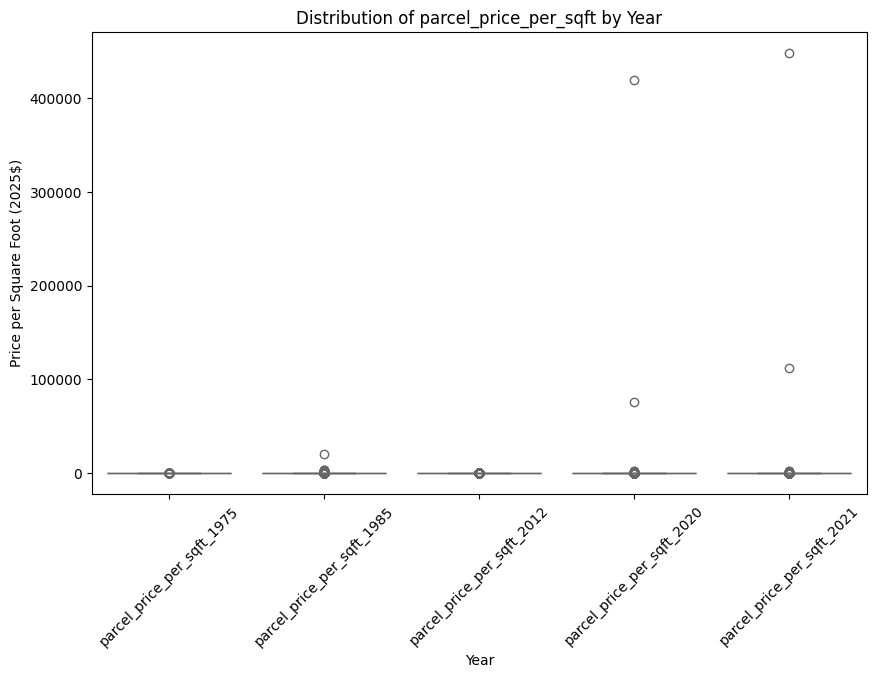

In [ ]:
# Calculate statistics for each year
stats_by_year = {}
for year in years:
    col = f'parcel_price_per_sqft_{year}'
    valid_data = lubbock_data[col].dropna()
    if not valid_data.empty:
        stats_by_year[year] = {
            'Mean': valid_data.mean(),
            'Median': valid_data.median(),
            'Min': valid_data.min(),
            'Max': valid_data.max(),
            'Count': len(valid_data)
        }

# Convert to DataFrame
stats_df = pd.DataFrame(stats_by_year).T
print("\nTable: Statistics of parcel_price_per_sqft by Year")
print(stats_df)

# Visualize distribution with box plots
plt.figure(figsize=(10, 6))
sns.boxplot(data=lubbock_data[[f'parcel_price_per_sqft_{year}' for year in years if f'parcel_price_per_sqft_{year}' in lubbock_data.columns]], palette='Set3')
plt.title('Distribution of parcel_price_per_sqft by Year')
plt.xlabel('Year')
plt.ylabel('Price per Square Foot (2025$)')
plt.xticks(rotation=45)
plt.show()


Table: Statistics of parcel_price_per_sqft_2021 by Zone
       ZoneCategory       mean     median       min            max  count
0  Half-mile Buffer  36.156573   7.149117  0.000000  112358.316897   4800
1   One-mile Buffer  10.552345   8.706888  0.002428     147.166166   5252
2      Outside Both  28.591141  21.722093  0.000000  448180.500000  79855
3    Redlining Zone  11.263682   5.341354  0.032103     583.002718    856


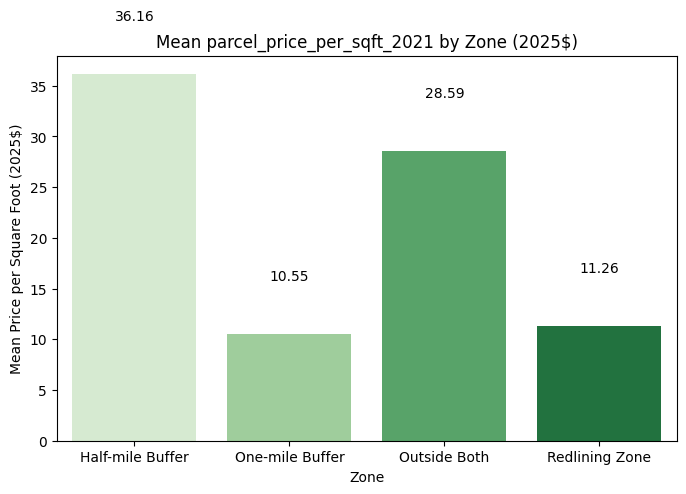

In [ ]:
# Filter for 2021 data
year = '2021'
price_col = f'parcel_price_per_sqft_{year}'
zone_stats = lubbock_data.groupby('ZoneCategory')[price_col].agg(['mean', 'median', 'min', 'max', 'count']).reset_index()
print("\nTable: Statistics of parcel_price_per_sqft_2021 by Zone")
print(zone_stats)

# Visualize with a bar plot for mean values
plt.figure(figsize=(8, 5))
sns.barplot(x='ZoneCategory', y='mean', data=zone_stats, palette='Greens')
plt.title(f'Mean parcel_price_per_sqft_{year} by Zone (2025$)')
plt.xlabel('Zone')
plt.ylabel('Mean Price per Square Foot (2025$)')
for i, mean in enumerate(zone_stats['mean']):
    plt.text(i, mean + 5, f'{mean:.2f}', ha='center', va='bottom')
plt.show()


Table: Missing Value Counts by Year
      Value_Missing  Size_Missing  Price_Missing
1975          71107         96191          96191
1985          84611         84587          84696
2012          14558         14558          16251
2020           5891          5891           7462
2021           4200          4200           5829


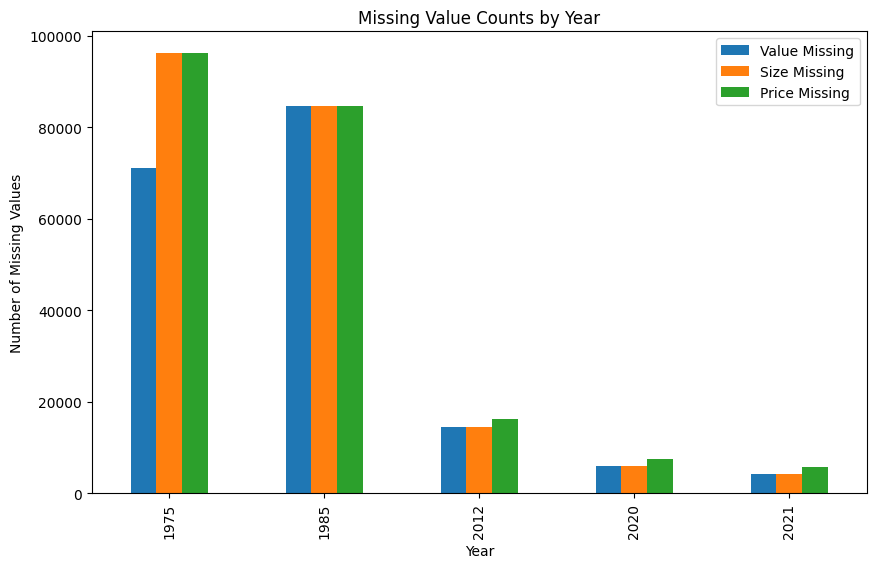

In [ ]:
# Check missing value counts by year
missing_counts = {}
for year in years:
    value_col = f'F2025DollarValueTotalValue_{year}'
    size_col = 'Area_1975' if year == '1975' else ('AreaSqft_1985' if year == '1985' else f'LandSizeFT_{year}')
    price_col = f'parcel_price_per_sqft_{year}'
    missing_counts[year] = {
        'Value_Missing': lubbock_data[value_col].isna().sum(),
        'Size_Missing': lubbock_data[size_col].isna().sum(),
        'Price_Missing': lubbock_data[price_col].isna().sum()
    }

# Convert to DataFrame
missing_df = pd.DataFrame(missing_counts).T
print("\nTable: Missing Value Counts by Year")
print(missing_df)

# Visualize missing value proportions
missing_df.plot(kind='bar', figsize=(10, 6))
plt.title('Missing Value Counts by Year')
plt.xlabel('Year')
plt.ylabel('Number of Missing Values')
plt.legend(['Value Missing', 'Size Missing', 'Price Missing'])
plt.show()

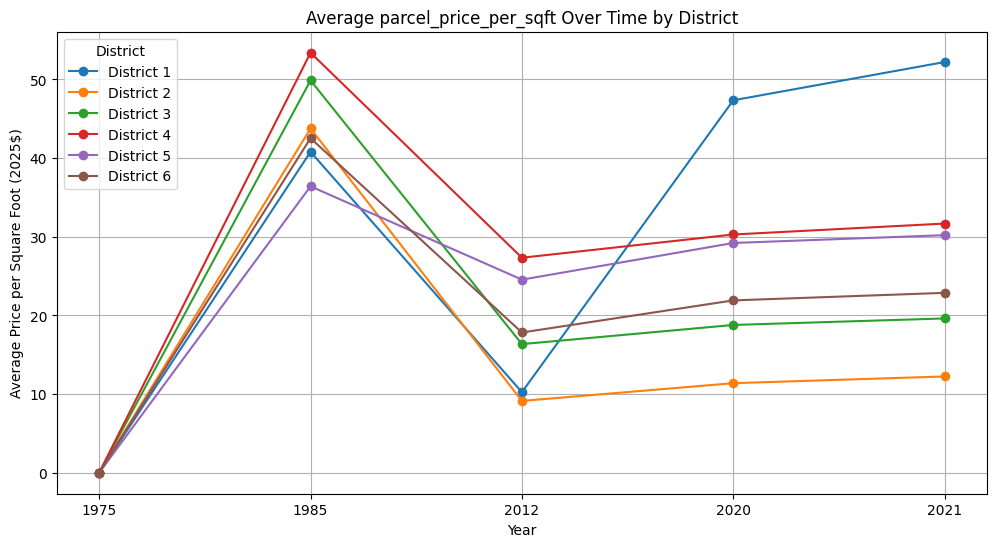

In [ ]:
# Define years
years = ['1975', '1985', '2012', '2020', '2021']

# Calculate average price per sqft by district and year
avg_price_by_district = {}
for year in years:
    col = f'parcel_price_per_sqft_{year}'
    avg_price_by_district[year] = lubbock_data.groupby('IsInCouncilDistrict')[col].mean()

# Convert to DataFrame
avg_price_df = pd.DataFrame(avg_price_by_district).T

# Plot
plt.figure(figsize=(12, 6))
for district in avg_price_df.columns:
    plt.plot(avg_price_df.index, avg_price_df[district], marker='o', label=f'District {district}')
plt.title('Average parcel_price_per_sqft Over Time by District')
plt.xlabel('Year')
plt.ylabel('Average Price per Square Foot (2025$)')
plt.legend(title='District')
plt.grid(True)
plt.show()

# MAPS

In [ ]:
# -------------------------------
# Define Shapefile Paths
# -------------------------------
city_limit_path = "/content/unzipped_files/CityLimit/CityLimit.shp"
council_district_path = "/content/unzipped_files/CouncilDistricts/CouncilDistricts.shp"
redlining_zone_path = "/content/unzipped_files/RedliningZone/RedliningZone.shp"
halfmile_buffer_zone_path = "/content/unzipped_files/RedliningZoneHalfMile/RedliningZoneHalfMile.shp"
onemile_buffer_zone_path = "/content/unzipped_files/RedliningZoneOneMile/RedliningZoneOneMile.shp"

# -------------------------------
# Helper: Load & Process Shapefile
# -------------------------------
def load_and_process_shapefile(path):
    gdf = gpd.read_file(path)
    if gdf.crs != "EPSG:4326":
        gdf = gdf.to_crs(epsg=4326)
    # Convert any datetime columns to strings (skip geometry column)
    for col in gdf.columns:
        if col == gdf.geometry.name:
            continue
        if np.issubdtype(gdf[col].dtype, np.datetime64):
            gdf[col] = gdf[col].astype(str)
    return gdf

# -------------------------------
# Load Each Layer
# -------------------------------
city_limit = load_and_process_shapefile(city_limit_path)
council_districts = load_and_process_shapefile(council_district_path)
redlining_zone = load_and_process_shapefile(redlining_zone_path)
halfmile_buffer_zone = load_and_process_shapefile(halfmile_buffer_zone_path)
onemile_buffer_zone = load_and_process_shapefile(onemile_buffer_zone_path)

# -------------------------------
# Helper: Create Interactive Map for a Layer
# -------------------------------
def create_interactive_map(gdf, map_title, color):
    # Calculate map center based on the layer's centroid
    center = [gdf.geometry.centroid.y.mean(), gdf.geometry.centroid.x.mean()]
    m = folium.Map(location=center, zoom_start=12)
    folium.GeoJson(
        gdf,
        name=map_title,
        style_function=lambda feature: {"color": color, "weight": 2, "fillOpacity": 0.4}
    ).add_to(m)
    folium.LayerControl().add_to(m)
    return m

# -------------------------------
# Create Interactive Maps for Each Layer
# -------------------------------
city_limit_map = create_interactive_map(city_limit, "City Limit", "blue")
redlining_zone_map = create_interactive_map(redlining_zone, "Redlining Zone", "red")
halfmile_buffer_zone_map = create_interactive_map(halfmile_buffer_zone, "Half Mile Buffer Zone", "orange")
onemile_buffer_zone_map = create_interactive_map(onemile_buffer_zone, "One Mile Buffer Zone", "purple")

# -------------------------------
# Split Council Districts by District
# -------------------------------
# Change 'DISTRICT' to your actual attribute name if different.
district_column = "DISTRICT"
unique_districts = sorted(council_districts[district_column].unique())

# Create a list where each element is an interactive map for one district
council_district_maps = []
for district in unique_districts:
    district_gdf = council_districts[council_districts[district_column] == district]
    # Calculate the center for the district
    center = [district_gdf.geometry.centroid.y.mean(), district_gdf.geometry.centroid.x.mean()]
    m = folium.Map(location=center, zoom_start=12)
    folium.GeoJson(
        district_gdf,
        name=f"Council District {district}",
        style_function=lambda feature: {"color": "green", "weight": 2, "fillOpacity": 0.4}
    ).add_to(m)
    folium.LayerControl().add_to(m)
    council_district_maps.append(m)

# -------------------------------
# Now Can Access:
# - city_limit_map
# - redlining_zone_map
# - halfmile_buffer_zone_map
# - onemile_buffer_zone_map
# - council_district_maps (e.g., council_district_maps[0], council_district_maps[1], etc.)
# -------------------------------

# Optionally, display one of the maps to verify (for example, the first council district):
council_district_maps[0]
